In [9]:
import tensorflow as tf
import numpy as np
import pandas as pd
from joblib import delayed, Parallel
import time
import matplotlib.pyplot as plt
from matplotlib.image import imread
from itertools import combinations
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline
def show():
    sns.despine()
    plt.show()
np.set_printoptions(precision=3, suppress=True)

In [3]:
n_train = 2048
n_test = 5000
random_state = 0
classes = [2,4]
classes = range(14)
classes = [11, 12]
classnames = np.genfromtxt('annotations/category_names_eng.txt', dtype=str)

In [4]:
print([(a,b) for a,b in zip(range(len(classnames)), classnames)])

[(0, 'T-Shirt'), (1, 'Shirt'), (2, 'Knitwear'), (3, 'Chiffon'), (4, 'Sweater'), (5, 'Hoodie'), (6, 'Windbreaker'), (7, 'Jacket'), (8, 'Downcoat'), (9, 'Suit'), (10, 'Shawl'), (11, 'Dress'), (12, 'Vest'), (13, 'Underwear')]


In [28]:
data_clean = pd.read_csv('annotations/clean_label_kv.txt', delimiter=' ', names=['filename', 'label'])
data_noise = pd.read_csv('annotations/noisy_label_kv.txt', delimiter=' ', names=['filename', 'label'])
data = pd.merge(data_clean, data_noise, on='filename', how='inner', suffixes=('_clean', '_noise'))

In [351]:
data.shape

(37497, 3)

In [155]:
c = 0
for classes in combinations(range(14), 2):
    subset = data[data.label_clean.isin(classes) & data.label_noise.isin(classes)]
    size = len(subset)
    C = confusion_matrix(subset.label_clean, subset.label_noise, labels=classes)
    K = C / np.sum(C, axis=1, dtype=float)[:, np.newaxis]
    rho = [K[0, 1], K[1, 0]]
    names = [classnames[classes[0]], classnames[classes[1]]]
    
    if size < 4000 or abs(rho[0]-rho[1]) < 0.15:
        continue
    else:
         c += 1   
    print('%12s %12s %1.2f %1.2f size: %d classes: %s' % (names[0], names[1], rho[0], rho[1], size, classes))
print('found %d combinations' % c)

     T-Shirt      Chiffon 0.03 0.25 size: 4283 classes: (0, 3)
       Shirt      Chiffon 0.06 0.31 size: 4978 classes: (1, 3)
     Chiffon        Dress 0.22 0.04 size: 4472 classes: (3, 11)
       Dress         Vest 0.05 0.37 size: 4168 classes: (11, 12)
found 4 combinations


images/2/66/2265679116,3979349266.jpg
labeled as: Dress, true: Chiffon
noise rate: 0.22


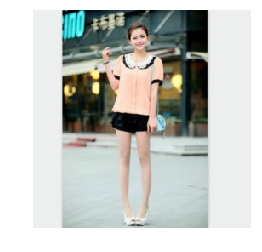

In [391]:
classes = (3, 11)
subset = data[(data.label_clean == classes[0]) & (data.label_noise == classes[1])]
C = confusion_matrix(data.label_clean, data.label_noise, labels=classes)
K = C / np.sum(C, axis=1, dtype=float)[:, np.newaxis]
rho = [K[0, 1], K[1, 0]]
filename = subset.sample().filename.iloc[0]
print(filename)
print('labeled as: %s, true: %s' % (classnames[classes[1]], classnames[classes[0]]))
print('noise rate: %1.2f' % (rho[0]))
img = imread(filename)
plt.imshow(img)
plt.axis('off')
plt.show()

In [152]:
subset

,filename,label_clean,label_noise
7,"images/4/83/66761643,4070947483.jpg",0,0
9,"images/9/17/2931722141,3995116917.jpg",3,0


In [151]:
C

array([[1, 0],
       [1, 0]])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
from scipy.misc import imread, imresize
def build_data(dataframe, rows=None):
    N = len(filenames) if rows is None else rows
    w = 227
    h = 227
    d = 3
    output = np.zeros((N, w, h, d), dtype=np.float32)
    for i in range(N):
        im = imresize(imread(dataframe.filename.iloc[i])[:,:,:3].astype(np.float32), (w, h))
        im = im - np.mean(im)
        output[i, ...] = im
    return output

In [14]:
x = build_data(data, rows=10)

In [15]:
import shutil
import os

In [16]:
for f in data.filename.values:
    dst = 'images/relabeling'
    shutil.copy(f, dst)
print('copied all files')

copied all files


In [17]:
f = '356343634,1453369113'

for i, s in enumerate(data.filename):
    if f in s:
        print(i)

2811


(256, 256, 3)
images/0/68/3554563055,1791280068.jpg


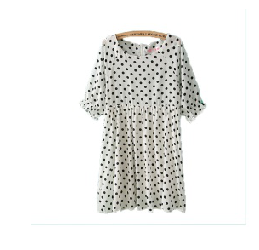

In [80]:
selection = data[(data.label_clean == 11) & (data.label_noise == 11)]
filename = selection.iloc[np.random.randint(len(selection))]['filename']
im = imread(filename)
plt.imshow(im)
plt.axis('off')
print(im.shape)
print(filename)
plt.show()

In [92]:
im_vest = imread('images/8/00/429149033,1548788800.jpg')
im_dress = imread('images/0/68/3554563055,1791280068.jpg')
im = np.zeros((256, 512, 3), dtype=np.uint8)
for i in range(3):
    im_dress[:,-5:,i] = 255
    im_dress[-5:,:,i] = 255
    im[:,:,i] = np.hstack((im_vest[:,:,i], im_dress[:,:,i]))
import scipy.misc
scipy.misc.imsave('classes.jpg', im)

(256, 512, 3)
images/6/73/209612850,1123416673.jpg


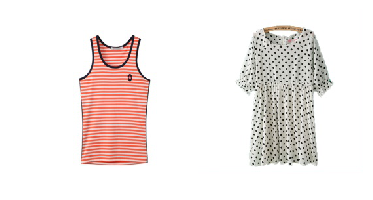

In [93]:
plt.imshow(im)
plt.axis('off')
print(im.shape)
print(filename)
plt.show()